<a href="https://colab.research.google.com/github/spponns/Machine-Learning/blob/main/NM_Project_College.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from  google.colab import files
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
data=files.upload()

Saving collegePlace.csv to collegePlace.csv


In [3]:
df=pd.read_csv(r"/content/collegePlace.csv")
df


,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [5]:
df.isnull().sum()


Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

<ipython-input-6-8fb365c73209>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


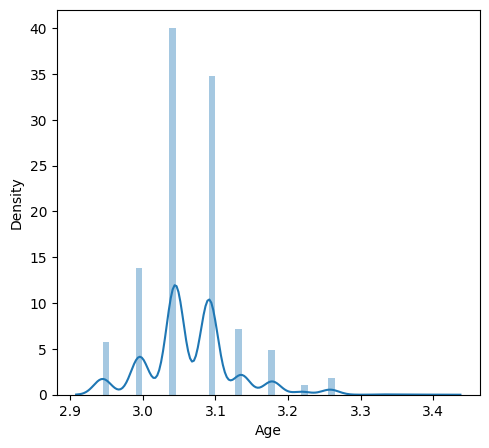

In [6]:
def transformationplot (feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)
transformationplot(np.log(df['Age']))

In [7]:
df=df.replace(['Male'],[0])
df=df.replace(['Female'],[1])
df=df.replace(['Computer Science','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],[0,1,2,3,4,5])
df=df.drop(['Hostel'],axis=1)
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


<ipython-input-8-6e32cdf8358a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

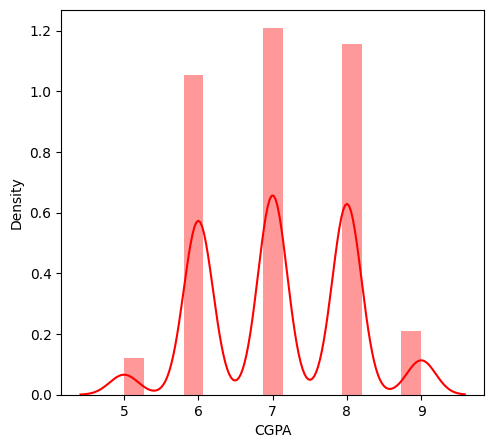

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'],color='r')

<ipython-input-9-0219391395df>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'],color='g')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

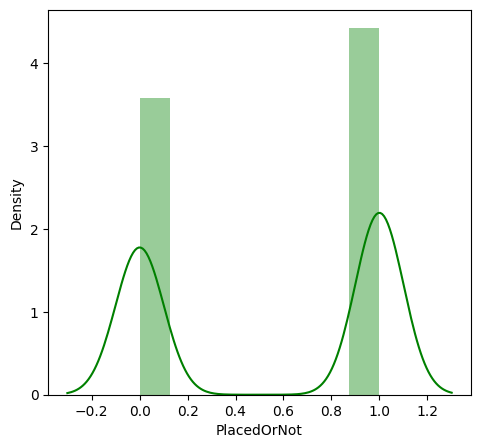

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['PlacedOrNot'],color='g')

<Axes: ylabel='count'>

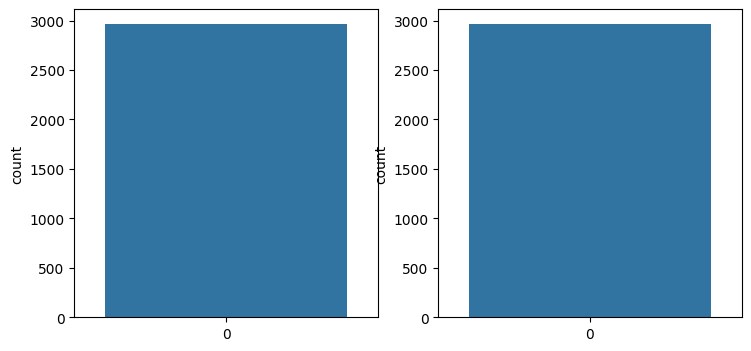

In [11]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(df['Gender'])
plt.subplot(1,4,2)
sns.countplot(df['Internships'])

<Axes: xlabel='PlacedOrNot', ylabel='count'>

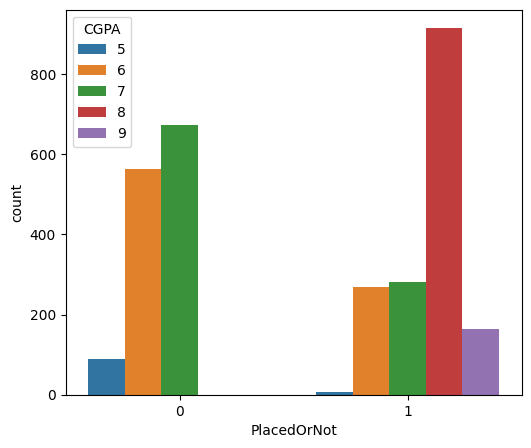

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x=df['PlacedOrNot'],hue=df['CGPA'])

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


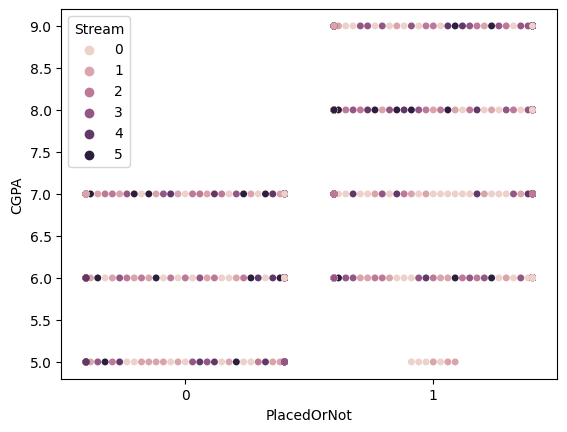

In [13]:
sns.swarmplot(x=df["PlacedOrNot"],y=df["CGPA"],hue=df['Stream'])

In [14]:
scaler = StandardScaler()

scaler.fit(df.drop('PlacedOrNot',axis=1))

scaled_features = scaler.transform(df.drop('PlacedOrNot',axis=1))
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
scaled_features.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,0.388131,-0.445403,0.040082,0.400445,0.957191,2.050246
1,-0.366752,2.245158,-1.148743,-0.950773,-0.076310,2.050246
2,0.388131,2.245158,-0.554331,0.400445,-1.109812,-0.487746
3,-0.366752,-0.445403,-0.554331,-0.950773,0.957191,2.050246
4,0.388131,-0.445403,0.634494,-0.950773,0.957191,-0.487746


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    df['PlacedOrNot'],
                                                    test_size = 0.25,
                                                    stratify=df['PlacedOrNot'],
                                                    random_state = 0)

In [16]:
cl=svm.SVC(kernel="linear")
cl.fit(X_train,y_train)
#SVC(kernel='linear')
xtp=cl.predict(X_train)
tda=accuracy_score(xtp,y_train)
print("Accuracy of the data : ",tda)

Accuracy of the data :  0.7738309352517986


In [20]:
best_k={"Regular":0}
best_score={"Regular":0}
for k in range(3,50,2):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train,y_train)
    knn_temp_pred=knn_temp.predict(X_test)
    score=metrics.accuracy_score(y_test,knn_temp_pred)*100
    if score >= best_score["Regular"] and score < 100:
      best_score["Regular"] =100
      best_k["Regular"]=k
  
print("---Results---\nK:{}\nScore:{}".format(best_k,best_score))
knn=KNeighborsClassifier(n_neighbors=best_score["Regular"])
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
testd=accuracy_score(knn_pred,y_test)


---Results---
K:{'Regular': 3}
Score:{'Regular': 100}


In [34]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

classifier=Sequential()
classifier.add(keras.layers.Dense(6,activation='relu'))
classifier.add(keras.layers.Dropout(0.50))

classifier.add(keras.layers.Dense(6,activation='relu'))
classifier.add(keras.layers.Dropout(0.50))

classifier.add(keras.layers.Dense(1,activation='sigmoid'))

loss_1=tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer="Adam",loss=loss_1,metrics=['accuracy'])

classifier.fit(X_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
112/112 [==============================] - 3s 5ms/step - loss: 0.8159 - accuracy: 0.5351
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 0.7357 - accuracy: 0.5733
Epoch 3/100
112/112 [==============================] - 0s 3ms/step - loss: 0.7086 - accuracy: 0.5697
Epoch 4/100
112/112 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5791
Epoch 5/100
112/112 [==============================] - 1s 5ms/step - loss: 0.6647 - accuracy: 0.5971
Epoch 6/100
112/112 [==============================] - 1s 4ms/step - loss: 0.6702 - accuracy: 0.5949
Epoch 7/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6106
Epoch 8/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6079
Epoch 9/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6187
Epoch 10/100
112/112 [==============================] - 0s 2ms/step - loss: 0.6115 - accura

# New Section